# TIDAL REPORT - SECTION A, GROUP 1

In [2]:
!python3 -m pip install 'scipy<1.10.0,>=1.6.0' 'urllib3<2.0' matplotlib 'numpy<1.23' 'tensorflow<2.16' --user --force-reinstall

  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached urllib3-1.26.20-py2.py3-none-any.whl.metadata (50 kB)
  Using cached matplotlib-3.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.3 kB)
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other require

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from scipy import optimize

2024-12-02 18:46:43.643752: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 18:46:43.647660: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 18:46:43.699137: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 18:46:43.705095: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-02 18:46:44.900520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2.13.1


### Here, we displayed the day, time, and heights of the tides.

In [4]:
data = np.genfromtxt('group_proj_data.txt', dtype=[('myint','i8'),('mystring','U6'),('myfloat','f8')])

day = []
time = []
height = []
for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])
    
print(day)
print(' ')
print(time)
print(' ')
print(height)
print(' ')

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]
 
['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:2

### Now, we are converting the time into days.

In [5]:
hours = []
minutes = []

for i in range(82):
    x = time[i].split(':')
    hours.append(float(x[0]))
    minutes.append(float(x[1]))
    
print(hours)
# print(minutes)

for i in range(len(minutes)):
   minutes[i] = minutes[i] / 60

print(minutes)

true_days = []

for i in range(82):
    true_days.append(hours[i] + minutes[i])
    true_days[i] = true_days[i] / 24
    true_days[i] = true_days[i] + day[i]
    
print(true_days)

[8.0, 15.0, 8.0, 16.0, 9.0, 17.0, 10.0, 18.0, 11.0, 18.0, 12.0, 19.0, 13.0, 20.0, 3.0, 21.0, 4.0, 21.0, 4.0, 11.0, 5.0, 12.0, 6.0, 13.0, 6.0, 14.0, 7.0, 15.0, 7.0, 15.0, 8.0, 16.0, 9.0, 16.0, 9.0, 17.0, 10.0, 17.0, 10.0, 18.0, 11.0, 18.0, 12.0, 19.0, 2.0, 19.0, 2.0, 20.0, 3.0, 10.0, 4.0, 11.0, 5.0, 12.0, 6.0, 13.0, 7.0, 14.0, 7.0, 15.0, 8.0, 16.0, 9.0, 16.0, 10.0, 17.0, 11.0, 18.0, 12.0, 18.0, 1.0, 19.0, 2.0, 20.0, 2.0, 9.0, 3.0, 11.0, 4.0, 12.0, 5.0, 13.0]
[0.11666666666666667, 0.6166666666666667, 0.9166666666666666, 0.4166666666666667, 0.75, 0.23333333333333334, 0.5833333333333334, 0.0, 0.4666666666666667, 0.7666666666666667, 0.36666666666666664, 0.5166666666666667, 0.4, 0.26666666666666666, 0.36666666666666664, 0.016666666666666666, 0.11666666666666667, 0.7666666666666667, 0.8333333333333334, 0.9666666666666667, 0.5166666666666667, 0.9333333333333333, 0.13333333333333333, 0.75, 0.7833333333333333, 0.4166666666666667, 0.36666666666666664, 0.0, 0.9833333333333333, 0.5666666666666667, 

In [6]:
x, y, y_err = true_days, height, 0.25

### Plotting the data itself

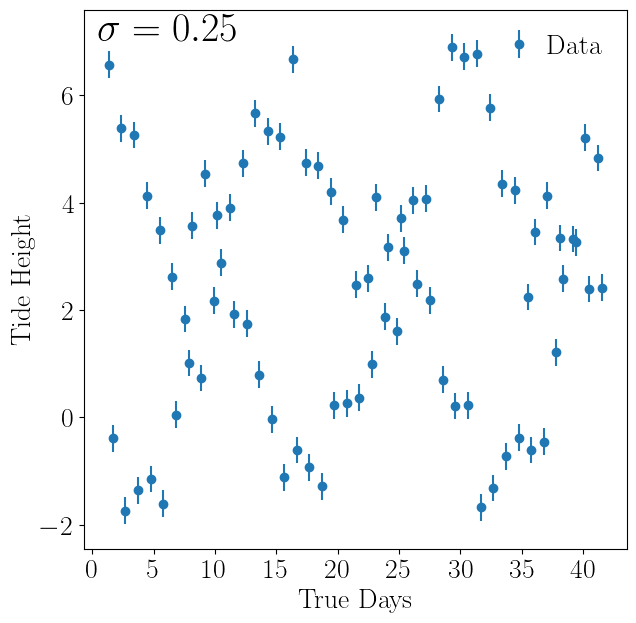

In [28]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'
f, ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x,y,y_err,fmt='o',label='Data')
ax.text(0.5,7,r'$\sigma = 0.25$',color='0', fontsize=29)
ax.set_xlabel('True Days',fontsize=20)
ax.set_ylabel('Tide Height',fontsize=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0)

### Setting up and displaying the best fit curve

In [29]:
def sinusoid(x,A,f,p,c,z,k,q):
    Amplitude = z*np.sin(f*x + p)  + q
    return (z_fit*tf.math.sin(f_fit*x + p_fit) + q_fit) * tf.math.sin(A_fit*x + k_fit) + c_init

In [9]:
A_init = 2*np.pi
A_fit = tf.Variable(A_init, name='amplitude')

f_init = (2*np.pi)/14.
f_fit = tf.Variable(f_init, name='frequency')

p_init = 0.0
p_fit = tf.Variable(p_init, name='phase')

c_init = np.mean(y)
c_fit = tf.Variable(c_init, name='constant')

z_init = 5.0
z_fit = tf.Variable(z_init, name='constant2')

k_init = 0.0
k_fit = tf.Variable(k_init, name='constantk')

q_init = 0.1
q_fit = tf.Variable(q_init, name='constantq')

In [30]:
@tf.function
def sinusoidal_model(x):
#    Amplitude = z_fit*tf.math.cos(f_fit*x + p_fit)  + q_fit
    return (z_fit*tf.math.sin(f_fit*x + p_fit) + q_fit) * tf.math.sin(A_fit*x + k_fit) + c_init

In [11]:
@tf.function
def mse(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [13]:
epochs = 10000
display_step = 1000

for epoch in range(epochs):
    
    if((epoch%display_step)==0):
       pred = sinusoidal_model(x)
       loss = mse(pred,y)
       
       print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p:{p_fit.numpy()}")
       
    with tf.GradientTape() as g:
       pred = sinusoidal_model(x)
       loss = mse(y,pred)
       
    gradients = g.gradient(loss, [A_fit,f_fit,z_fit,k_fit,q_fit,p_fit])

    optimizer.apply_gradients(zip(gradients,[A_fit,f_fit,z_fit,k_fit,q_fit,p_fit]))

print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p:{p_fit.numpy()}")
print("Done!")

Epoch 0 | Loss 7.890779858094119, A: 6.2831854820251465 f: 0.4487989544868469 p:0.0
Epoch 1000 | Loss 0.2402685138128171, A: 6.28143310546875 f: 0.4375501871109009 p:0.413455069065094
Epoch 2000 | Loss 0.24026287641393798, A: 6.281426429748535 f: 0.43753111362457275 p:0.4138934314250946
Epoch 3000 | Loss 0.24027103669094838, A: 6.2813801765441895 f: 0.4375055730342865 p:0.4138561189174652
Epoch 4000 | Loss 0.24070297274862368, A: 6.281044960021973 f: 0.43719667196273804 p:0.41359061002731323
Epoch 5000 | Loss 0.24026759897053235, A: 6.281479358673096 f: 0.43757444620132446 p:0.4139358401298523
Epoch 6000 | Loss 0.24026260744175973, A: 6.281438827514648 f: 0.4375348687171936 p:0.41389647126197815
Epoch 7000 | Loss 0.24026306146203458, A: 6.281437873840332 f: 0.4375336766242981 p:0.41389864683151245
Epoch 8000 | Loss 0.24026281725353327, A: 6.281437397003174 f: 0.43753358721733093 p:0.413897305727005
Epoch 9000 | Loss 0.2404038701100601, A: 6.281220436096191 f: 0.4373146891593933 p:0.413

In [14]:
print(A_fit.numpy())
print(f_fit.numpy())
print(z_fit.numpy())
print(k_fit.numpy())
print(q_fit.numpy())
print(p_fit.numpy())

6.281437
0.43753356
1.4210359
-0.058446173
2.910832
0.4138968


In [15]:
x_model = np.linspace(np.min(x),np.max(x),1000)
y_model = sinusoid(x_model,A_fit,f_fit,p_fit,c_fit,z_fit,k_fit,q_fit)

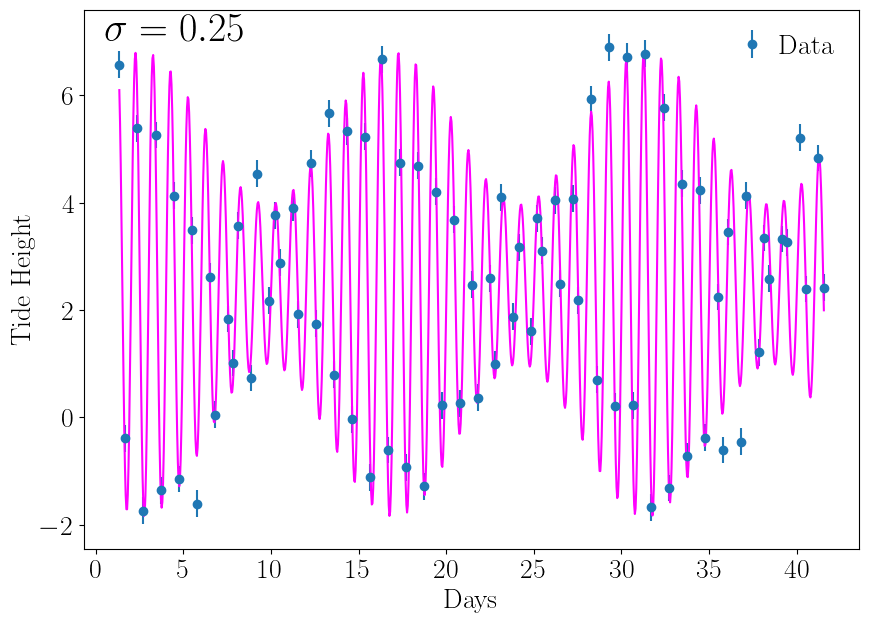

In [16]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'
f, ax = plt.subplots(1,1,figsize=(10,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x,y,y_err,fmt='o',label='Data')
ax.text(0.5,7,r'$\sigma = 0.25$',color='0', fontsize=29)
ax.set_xlabel('Days',fontsize=20)
ax.set_ylabel('Tide Height',fontsize=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0)
ax.plot(x_model,y_model,color='magenta',label='Best-fit Model')

### Plotting the data again, with day vs. tide height

Text(0, 0.5, 'Tide Height')

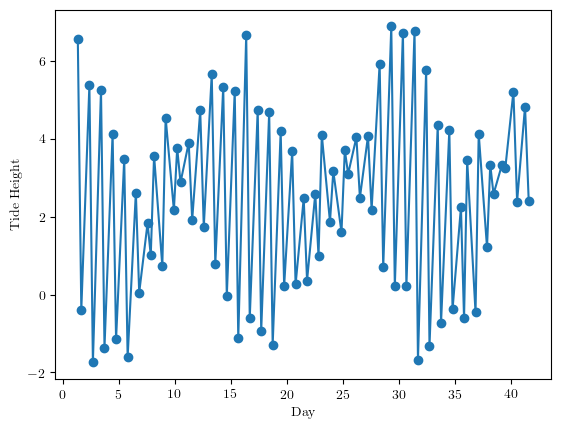

In [17]:
plt.plot(true_days, height, '-o')
plt.xlabel('Day')
plt.ylabel('Tide Height')

### Plotting the data with residuals

In [18]:
idx_model = np.argsort(true_days)
days_array = np.array(true_days)
height_array = np.array(height)
y_data = height_array[idx_model]
y_model = sinusoid(days_array[idx_model],A_fit,f_fit,p_fit,c_fit,z_fit,k_fit,q_fit)
residuals = y_data - y_model
residuals = residuals.numpy()

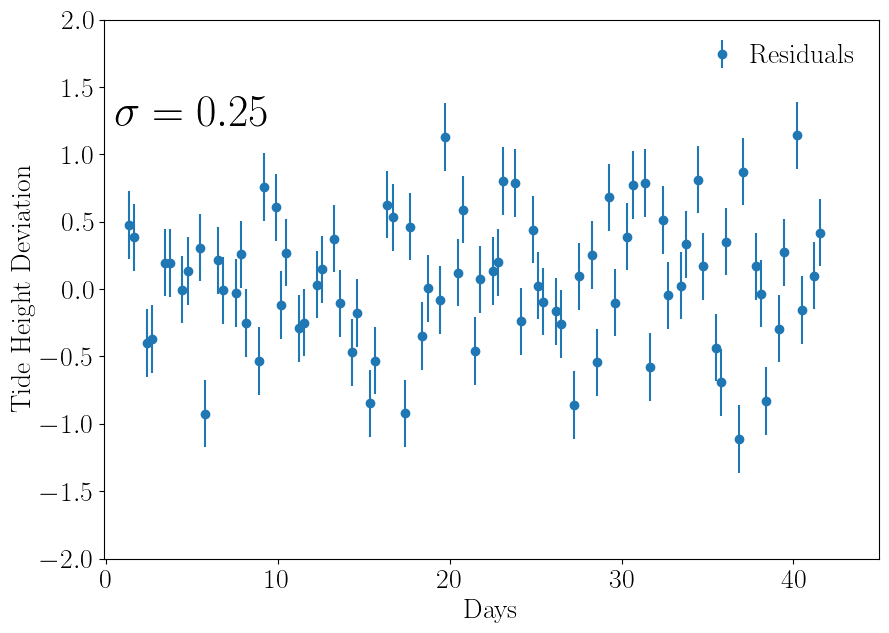

In [19]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'

f, ax = plt.subplots(1,1,figsize=(10,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(days_array,residuals,y_err,fmt = 'o', label='Residuals')
ax.set_xlim([-0.1,45])
ax.set_ylim([-2.,2])
ax.text(0.5,1.2,r'$\sigma = 0.25$',color='0',fontsize=32)
ax.set_xlabel('Days',fontsize=20)
ax.set_ylabel('Tide Height Deviation',fontsize=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0)

In [20]:
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
print(f'Mean residual is {residual_mean}')
print(f'RMS residual is {residual_std}')

Mean residual is 0.058838970959186554
RMS residual is 0.4866214990615845


### Making a histogram of the residuals

In [21]:
def gaussian(x,mu,s):
    return 1./(2.*np.pi*s**2)**0.5 * np.exp(-0.5*((x-mu)/s)**2)

82


Text(0.5, 0, 'Deviation')

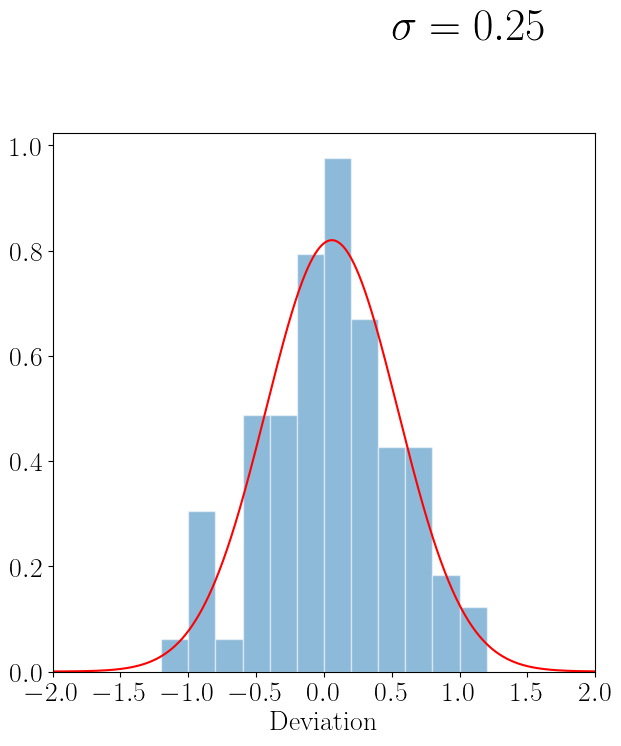

In [33]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'

f, ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)

print(len(residuals))
ax.hist(residuals,bins=20,range=(-2,2),alpha = 0.5, edgecolor="white",density=True)

x_g = np.linspace(-5*residual_std,5*residual_std,1000)
ax.plot(x_g,gaussian(x_g,residual_mean,residual_std),color="red")
ax.set_xlim([-2,2])

ax.text(0.5,1.2,r'$\sigma = 0.25$',color='0',fontsize=32)
ax.set_xlabel('Deviation',fontsize=20)

### Adding the tsunami outlier, plotting the residuals again, and plotting the histogram of the residuals again

In [23]:
x_out = 27
y_out  = sinusoid(x_out,A_fit,f_fit,p_fit,c_fit,z_fit,k_fit,q_fit) + 2
true_days_new = np.append(true_days,x_out) 
height_new = np.append(height,y_out) 

In [24]:
idx_model = np.argsort(true_days_new)
days_array_new = np.array(true_days_new)
height_array_new = np.array(height_new)
y_data_new = height_array_new[idx_model]
y_model_new = sinusoid(days_array_new[idx_model],A_fit,f_fit,p_fit,c_fit,z_fit,k_fit,q_fit)
residuals_new = y_data_new - y_model_new
residuals_new = residuals_new.numpy()

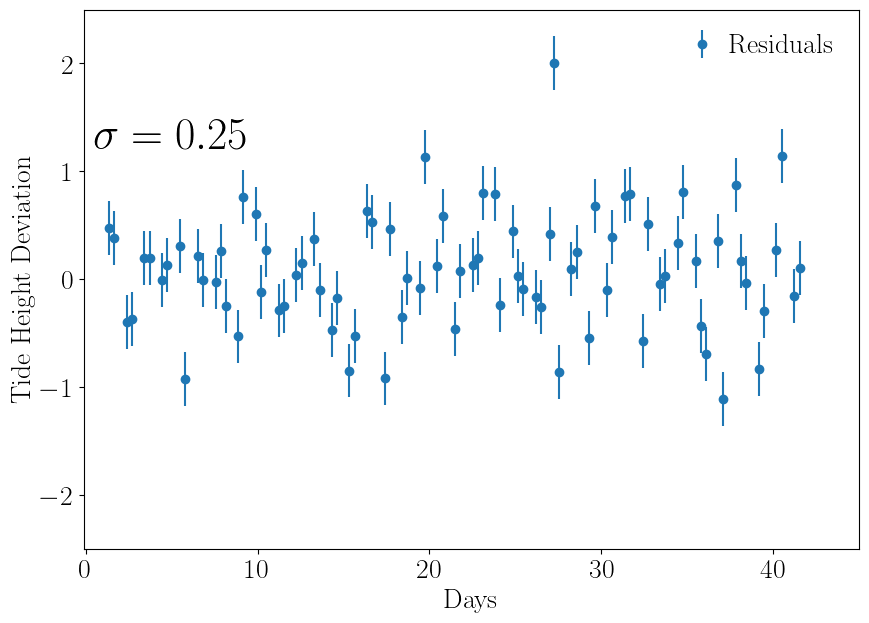

In [34]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'

f, ax = plt.subplots(1,1,figsize=(10,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(days_array_new,residuals_new,y_err,fmt = 'o', label='Residuals')
ax.set_xlim([-0.1,45])
ax.set_ylim([-2.5,2.5])
ax.text(0.5,1.2,r'$\sigma = 0.25$',color='0',fontsize=32)
ax.set_xlabel('Days',fontsize=20)
ax.set_ylabel('Tide Height Deviation',fontsize=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0)

83


Text(0.5, 0, 'Deviation from the Best Fit Curve')

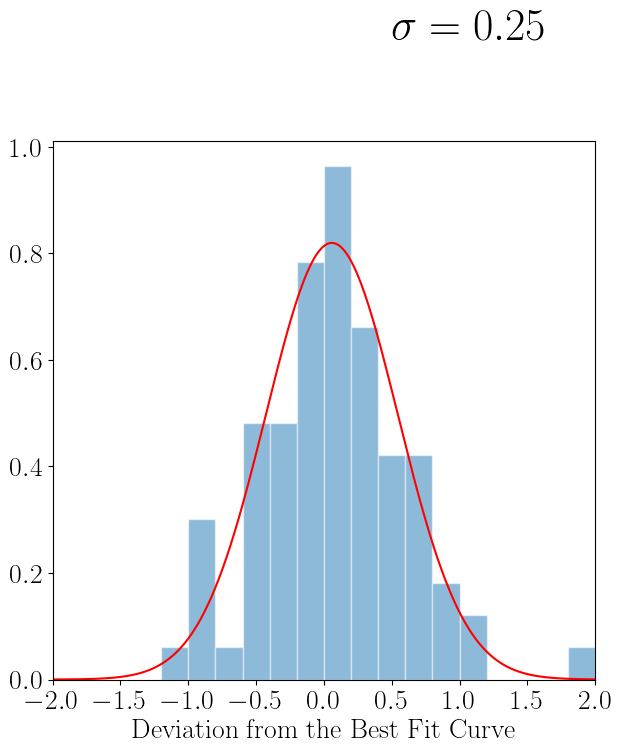

In [36]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'

f, ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)

print(len(residuals_new))
ax.hist(residuals_new,bins=20,range=(-2.,2),alpha = 0.5, edgecolor="white",density=True)

x_g = np.linspace(-5*residual_std,5*residual_std,1000)
ax.plot(x_g,gaussian(x_g,residual_mean,residual_std),color="red")
ax.set_xlim([-2,2])

ax.text(0.5,1.2,r'$\sigma = 0.25$',color='0',fontsize=32)
ax.set_xlabel('Deviation from the Best Fit Curve',fontsize=20)